<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [2]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas de Cauchy |    7      7  0.0s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [9]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false

Test Summary:        | Pass  Total  Time
RC et pas de Cauchy  |   15     15  0.8s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

In [8]:
using LinearAlgebra
using Markdown

include("../src/newton.jl")
include("../src/regions_de_confiance.jl")
include("../src/cauchy.jl")
include("../src/gct.jl")

# Affichage les sorties de l'algorithme des Régions de confiance
function afficher2(algo,fct,point_initial,x_sol,f_sol,flag,sol_exacte,nbiters)
	println("-------------------------------------------------------------------------")
	printstyled("Résultats de : ",algo, " appliqué à ",fct, " au point initial ", point_initial, ":\n",bold=true,color=:blue)
	println("  * xsol = ",x_sol)
	println("  * f(xsol) = ",f_sol)
	println("  * nb_iters = ",nbiters)
	println("  * flag = ",flag)
	println("  * sol_exacte : ", sol_exacte)
end
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
grad_f1(x) = [4*(x[1]+x[2]+x[3]−3)+2*(x[1]−x[2]);4*(x[1]+x[2]+x[3]−3)-2*(x[1]−x[2])+2*(x[2]−x[3]);4*(x[1]+x[2]+x[3]−3)-2*(x[2]−x[3])]
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1 ,1 ,1]
x0 = [-1,100,100]
x_sol,f_sol,flag,nb_iters = newton(f1,grad_f1,hess_f1,x0)
afficher2("Newton","f1",x0,x_sol,f_sol,flag,sol_exacte,nb_iters)

x_sol,f_sol,flag,nb_iters = regions_de_confiance(f1,grad_f1,hess_f1,x0,algo_pas="cauchy")
afficher2("RC-cauchy","f1",x0,x_sol,f_sol,flag,sol_exacte,nb_iters)

println("-------------------------------------------------------------------------")
println("\n f1 étant une fonction quadratique, son modèle de Taylor d'ordre 2 est équivalent à la fonction elle-même. L'algorithme de Newton converge rapidement en une seule itération vers la solution exacte, profitant de cette correspondance. En revanche, l'algorithme des régions de confiance avec le pas de Cauchy peut nécessiter plus d'itérations pour converger vers la solution exacte pour les fonctions quadratiques. Ainsi, pour les formes quadratiques, l'algorithme de Newton démontre une meilleure performance par rapport à l'algorithme des régions de confiance.")

-------------------------------------------------------------------------
Résultats de : Newton appliqué à f1 au point initial [-1, 100, 100]:
  * xsol = [1.0, 1.0, 1.0]
  * f(xsol) = 0.0
  * nb_iters = 1
  * flag = 0
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC-cauchy appliqué à f1 au point initial [-1, 100, 100]:
  * xsol = [0.9999949028313507, 0.9999996556096755, 1.000004408606571]
  * f(xsol) = 4.731386262483046e-11
  * nb_iters = 45
  * flag = 2
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------

 f1 étant une fonction quadratique, son modèle de Taylor d'ordre 2 est équivalent à la fonction elle-même. L'algorithme de Newton converge rapidement en une seule itération vers la solution exacte, profitant de cette correspondance. En revanche, l'algorithme des régions de confiance avec le pas de Cauchy peut nécessiter plus d'itérations pour converger vers la soluti

Tableau d'itération pour Δmax croissantes:
Any[85, 51, 50, 48, 44, 50, 51, 53, 53, 49]

Tableau d'itération pour gamma2 croissantes:
Any[85, 49, 45, 47, 47, 39, 44, 42, 47, 45, 45, 53, 57, 56, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53]

Tableau d'itération pour eta2 croissantes:
Any[45, 45, 45, 85, 85, 85, 85, 85, 85, 85]

 On peut influencer la performance de l'algorithme en ajustant divers paramètres tels que Δmax, η1, η2,  γ1, et γ2. Dans cette étude, j'ai  examiné l'impact de eta2 et gamma2 sur le nombre d'itérations, comme présenté dans les graphiques précédents. Ces paramètres jouent un rôle dans la détermination des pas de l'algorithme et la mise à jour de la région de confiance, inf

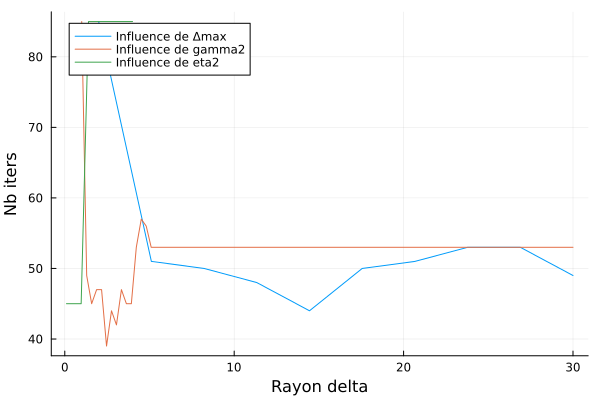

In [7]:
using Plots

# Vos définitions de fonctions ici...

#L'influence du Δmax
iters_delta = []
for rayon in range(2, 30, 10)
    x_sol, f_sol, flag, nb_iters = regions_de_confiance(f1, grad_f1, hess_f1, x0, Δmax=rayon, algo_pas="cauchy")
    push!(iters_delta, nb_iters)   
end

#L'influence de gamma1
iters_gamma = []
for gamma2 in range(1, 30, 100)
    x_sol, f_sol, flag, nb_iters = regions_de_confiance(f1, grad_f1, hess_f1, x0, γ2=gamma2, algo_pas="cauchy")
    push!(iters_gamma, nb_iters)   
end

iters_eta=[]
for eta2 in range(0.1,4,10)
   x_sol,f_sol,flag,nb_iters = regions_de_confiance(f1, grad_f1, hess_f1, x0, η2=eta2, algo_pas="cauchy")
   push!(iters_eta, nb_iters)   
end
# Afficher le tableau d'itération 
println("Tableau d'itération pour Δmax croissantes:")
println(iters_delta)
println("\nTableau d'itération pour gamma2 croissantes:")
println(iters_gamma)
println("\nTableau d'itération pour eta2 croissantes:")
println(iters_eta)
println("\n On peut influencer la performance de l'algorithme en ajustant divers paramètres tels que Δmax, η1, η2,  γ1, et γ2. Dans cette étude, j'ai  examiné l'impact de eta2 et gamma2 sur le nombre d'itérations, comme présenté dans les graphiques précédents. Ces paramètres jouent un rôle dans la détermination des pas de l'algorithme et la mise à jour de la région de confiance, influençant ainsi la convergence de l'optimisation.")
# Tracé des deux courbes dans un même graphique
plot(range(2, 30, 10), iters_delta, label="Influence de Δmax", xlabel="Rayon delta", ylabel="Nb iters", legend=:topleft)
plot!(range(1, 30, 100), iters_gamma, label="Influence de gamma2")
plot!(range(0.1, 4, 10), iters_eta, label="Influence de eta2")



# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [6]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.0s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [5]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false

Test Summary: | Pass  Total  Time
RC et gct     |   15     15  0.9s


## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

In [17]:
println(" Pas de Cauchy : Bien qu'il puisse fournir des résultats suffisamment précis en quelques itérations pour certains problèmes simples, il présente généralement une précision moindre et une convergence plus lente par rapport à gct, même dans une limite d'itérations maximale prédéfinie.")

println("\n gct : Dans la plupart des cas, les étapes de calcul et les directions de gct conduisent à une convergence plus rapide avec moins d'itérations, offrant des solutions plus précises que celles obtenues avec la méthode Pas de Cauchy. ")

 Pas de Cauchy : Bien qu'il puisse fournir des résultats suffisamment précis en quelques itérations pour certains problèmes simples, il présente généralement une précision moindre et une convergence plus lente par rapport à gct, même dans une limite d'itérations maximale prédéfinie.

 gct : Dans la plupart des cas, les étapes de calcul et les directions de gct conduisent à une convergence plus rapide avec moins d'itérations, offrant des solutions plus précises que celles obtenues avec la méthode Pas de Cauchy. 
